In [111]:
import numpy as np
import math
from funcoesTermosol import importa
from funcoesTermosol import plota

In [112]:
[nn,N,nm,Inc,nc,F,nr,R] = importa('entrada.xlsx')

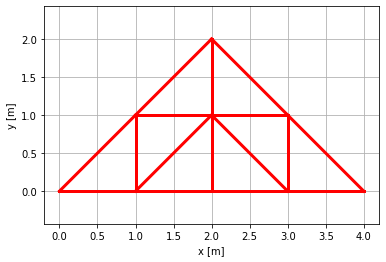

In [113]:
plota(N,Inc)

In [114]:
#descobrindo o L
L = []
relacoes1 = Inc[:,0]
relacoes2 = Inc[:,1]
x = N[0]
y = N[1]

for e in range(nm):
    x1 = x[int(relacoes1[e])-1]
    y1 = y[int(relacoes1[e])-1]
    x2 = x[int(relacoes2[e])-1]
    y2 = y[int(relacoes2[e])-1]
    
    L.append(((x1-x2)**2+(y1-y2)**2)**(1/2))

L

[1.0,
 1.0,
 1.0,
 1.0,
 1.4142135623730951,
 1.0,
 1.4142135623730951,
 1.0,
 1.4142135623730951,
 1.0,
 1.0,
 1.0,
 1.4142135623730951,
 1.4142135623730951,
 1.0,
 1.4142135623730951]

In [115]:
#descobrindo os senos e cossenos
cos =[]
sen=[]

for e in range(nm):
    x1 = x[int(relacoes1[e])-1]
    y1 = y[int(relacoes1[e])-1]
    x2 = x[int(relacoes2[e])-1]
    y2 = y[int(relacoes2[e])-1]
    
    sen.append((y2-y1)/L[e])
    cos.append((x2-x1)/L[e])


In [116]:
E = []
A = []

for e in range(nm):
    E.append(Inc[e][2])
    A.append(Inc[e][3])
  

In [117]:
TK =[]

for e in range(nm):
    c = cos[e]
    s = sen [e]
    T = np.array([[c**2, c*s, -c**2, -c*s],
                [c*s, s**2, -c*s, -s**2],
                 [-c**2, -c*s, c**2, c*s],
                 [-c*s, -s**2, c*s, s**2]])
    TK.append((E[e]*A[e]/L[e]) * (T))

len(TK)

16

In [118]:
gdl = []
nos = np.delete(Inc, [2,3], 1)
for par in nos:
    lista = []
    lista.append(par[0]*2-2)
    lista.append(par[0]*2-1)
    lista.append(par[1]*2-2)
    lista.append(par[1]*2-1)
    gdl.append(lista)
    
len(gdl)

16

In [119]:
gdlmax = 18

gdl = []
nos = np.delete(Inc, [2,3], 1)
for par in nos:
    lista = []
    lista.append(par[0]*2-2)
    lista.append(par[0]*2-1)
    lista.append(par[1]*2-2)
    lista.append(par[1]*2-1)
    gdl.append(lista)

for ke in range(len(TK)):
    Kglobal[int(gdl[ke][0]):int(gdl[ke][1]+1),int(gdl[ke][0]):int(gdl[ke][1]+1)] += TK[ke][0:2,0:2] # A
    Kglobal[int(gdl[ke][2]):int(gdl[ke][3]+1),int(gdl[ke][0]):int(gdl[ke][1]+1)] += TK[ke][2:4,0:2] # B
    Kglobal[int(gdl[ke][0]):int(gdl[ke][1]+1),int(gdl[ke][2]):int(gdl[ke][3]+1)] += TK[ke][0:2,2:4] # C
    Kglobal[int(gdl[ke][2]):int(gdl[ke][3]+1),int(gdl[ke][2]):int(gdl[ke][3]+1)] += TK[ke][2:4,2:4] # D

Kglobal

array([[ 1.75160795e+10,  3.34107954e+09, -9.45000000e+09,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.34107954e+09, -3.34107954e+09,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.34107954e+09,  3.34107954e+09,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.34107954e+09, -3.34107954e+09,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.45000000e+09,  0.00000000e+00,  2.22410795e+10,
         3.34107954e+09, -9.45000000e+09,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.34107954e+09, -3.34107954e+09,  0.00000000e

In [120]:
F_contorno = np.delete(F, R)
F_contorno

C:\Users\mucha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  """Entry point for launching an IPython kernel.


array([    0.,     0.,     0.,  2000.,     0.,     0.,     0.,     0.,
           0.,  2000., 10000.])

In [121]:
Kcontorno = np.delete(Kglobal, R, 0)
Kcontorno = np.delete(Kcontorno, R, 1)

Kcontorno.shape

C:\Users\mucha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  """Entry point for launching an IPython kernel.
C:\Users\mucha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


(11, 11)

In [122]:
np.linalg.solve(Kcontorno, F_contorno)

array([1.37767322e-07, 8.13724017e-08, 2.49774815e-08, 6.10718058e-07,
       8.75495367e-08, 3.11528310e-07, 3.75412764e-07, 1.75083365e-07,
       1.36444945e-07, 6.67757465e-07, 9.76405209e-07])

In [123]:
uzinho = np.dot(np.linalg.inv(Kcontorno), F_contorno)
uzinho

array([1.37767322e-07, 8.13724017e-08, 2.49774815e-08, 6.10718058e-07,
       8.75495367e-08, 3.11528310e-07, 3.75412764e-07, 1.75083365e-07,
       1.36444945e-07, 6.67757465e-07, 9.76405209e-07])

In [109]:
def jacobi(ite, tol, K, F):
    X = np.zeros((len(F), 1))
    D = np.diag(K)
    R = K - np.diagflat(D)
    
    for i in range(ite):
        for k in range(len(F)):
            antigo = np.copy(X[k])
            X[k] = (F[k] - np.dot(R, X)[k])/D[k]
            

        if X[i] > 0:
            erro = np.abs((X[i] - antigo)/ X[i])
            if erro > tol:
                pass
            else:
                return X
            else: 
                pass

gauss(30, 10E-10, Kcontorno, F_contorno)

SyntaxError: invalid syntax (<ipython-input-109-ef8de1024b66>, line 18)

In [ ]:
def gauss(ite, tol, K, F):
    X = np.zeros((len(F), 1))
    
    for n in range(ite):
        for i in range(len(K)):
            antigo = np.copy(X[i])
            b = F[i]
            
            for j in range(len(K)):
                if j != i:
                    b -= K[i][j] * X[j]
            X[i] = b / K[i][i]
            
            if X[i] > 0:
                erro = np.abs((X[i] - antigo)/ X[i])
                if erro > tol:
                    pass
                else:
                    return X
            else: 
                pass
                
            